In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [13]:
df = pd.read_csv('lokata.csv', sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
duplicate_rows = df.duplicated().sum()
print(f'Sum of duplicated rows: {duplicate_rows}')

df_clean = df.drop_duplicates()
print(df_clean.dtypes)

Sum of duplicated rows: 12
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [18]:
df_clean['y'] = df_clean['y'].map({'no': 0, 'yes': 1})
df2 = df_clean.copy()

C:\Users\kalin\AppData\Local\Temp\ipykernel_7612\1361703548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['y'] = df_clean['y'].map({'no': 0, 'yes': 1})


job: 0 'unknown'
marital: 0 'unknown'
education: 1557 'unknown'
default: 8212 'unknown'
housing: 0 'unknown'
loan: 0 'unknown'
poutcome: 0 'unknown'


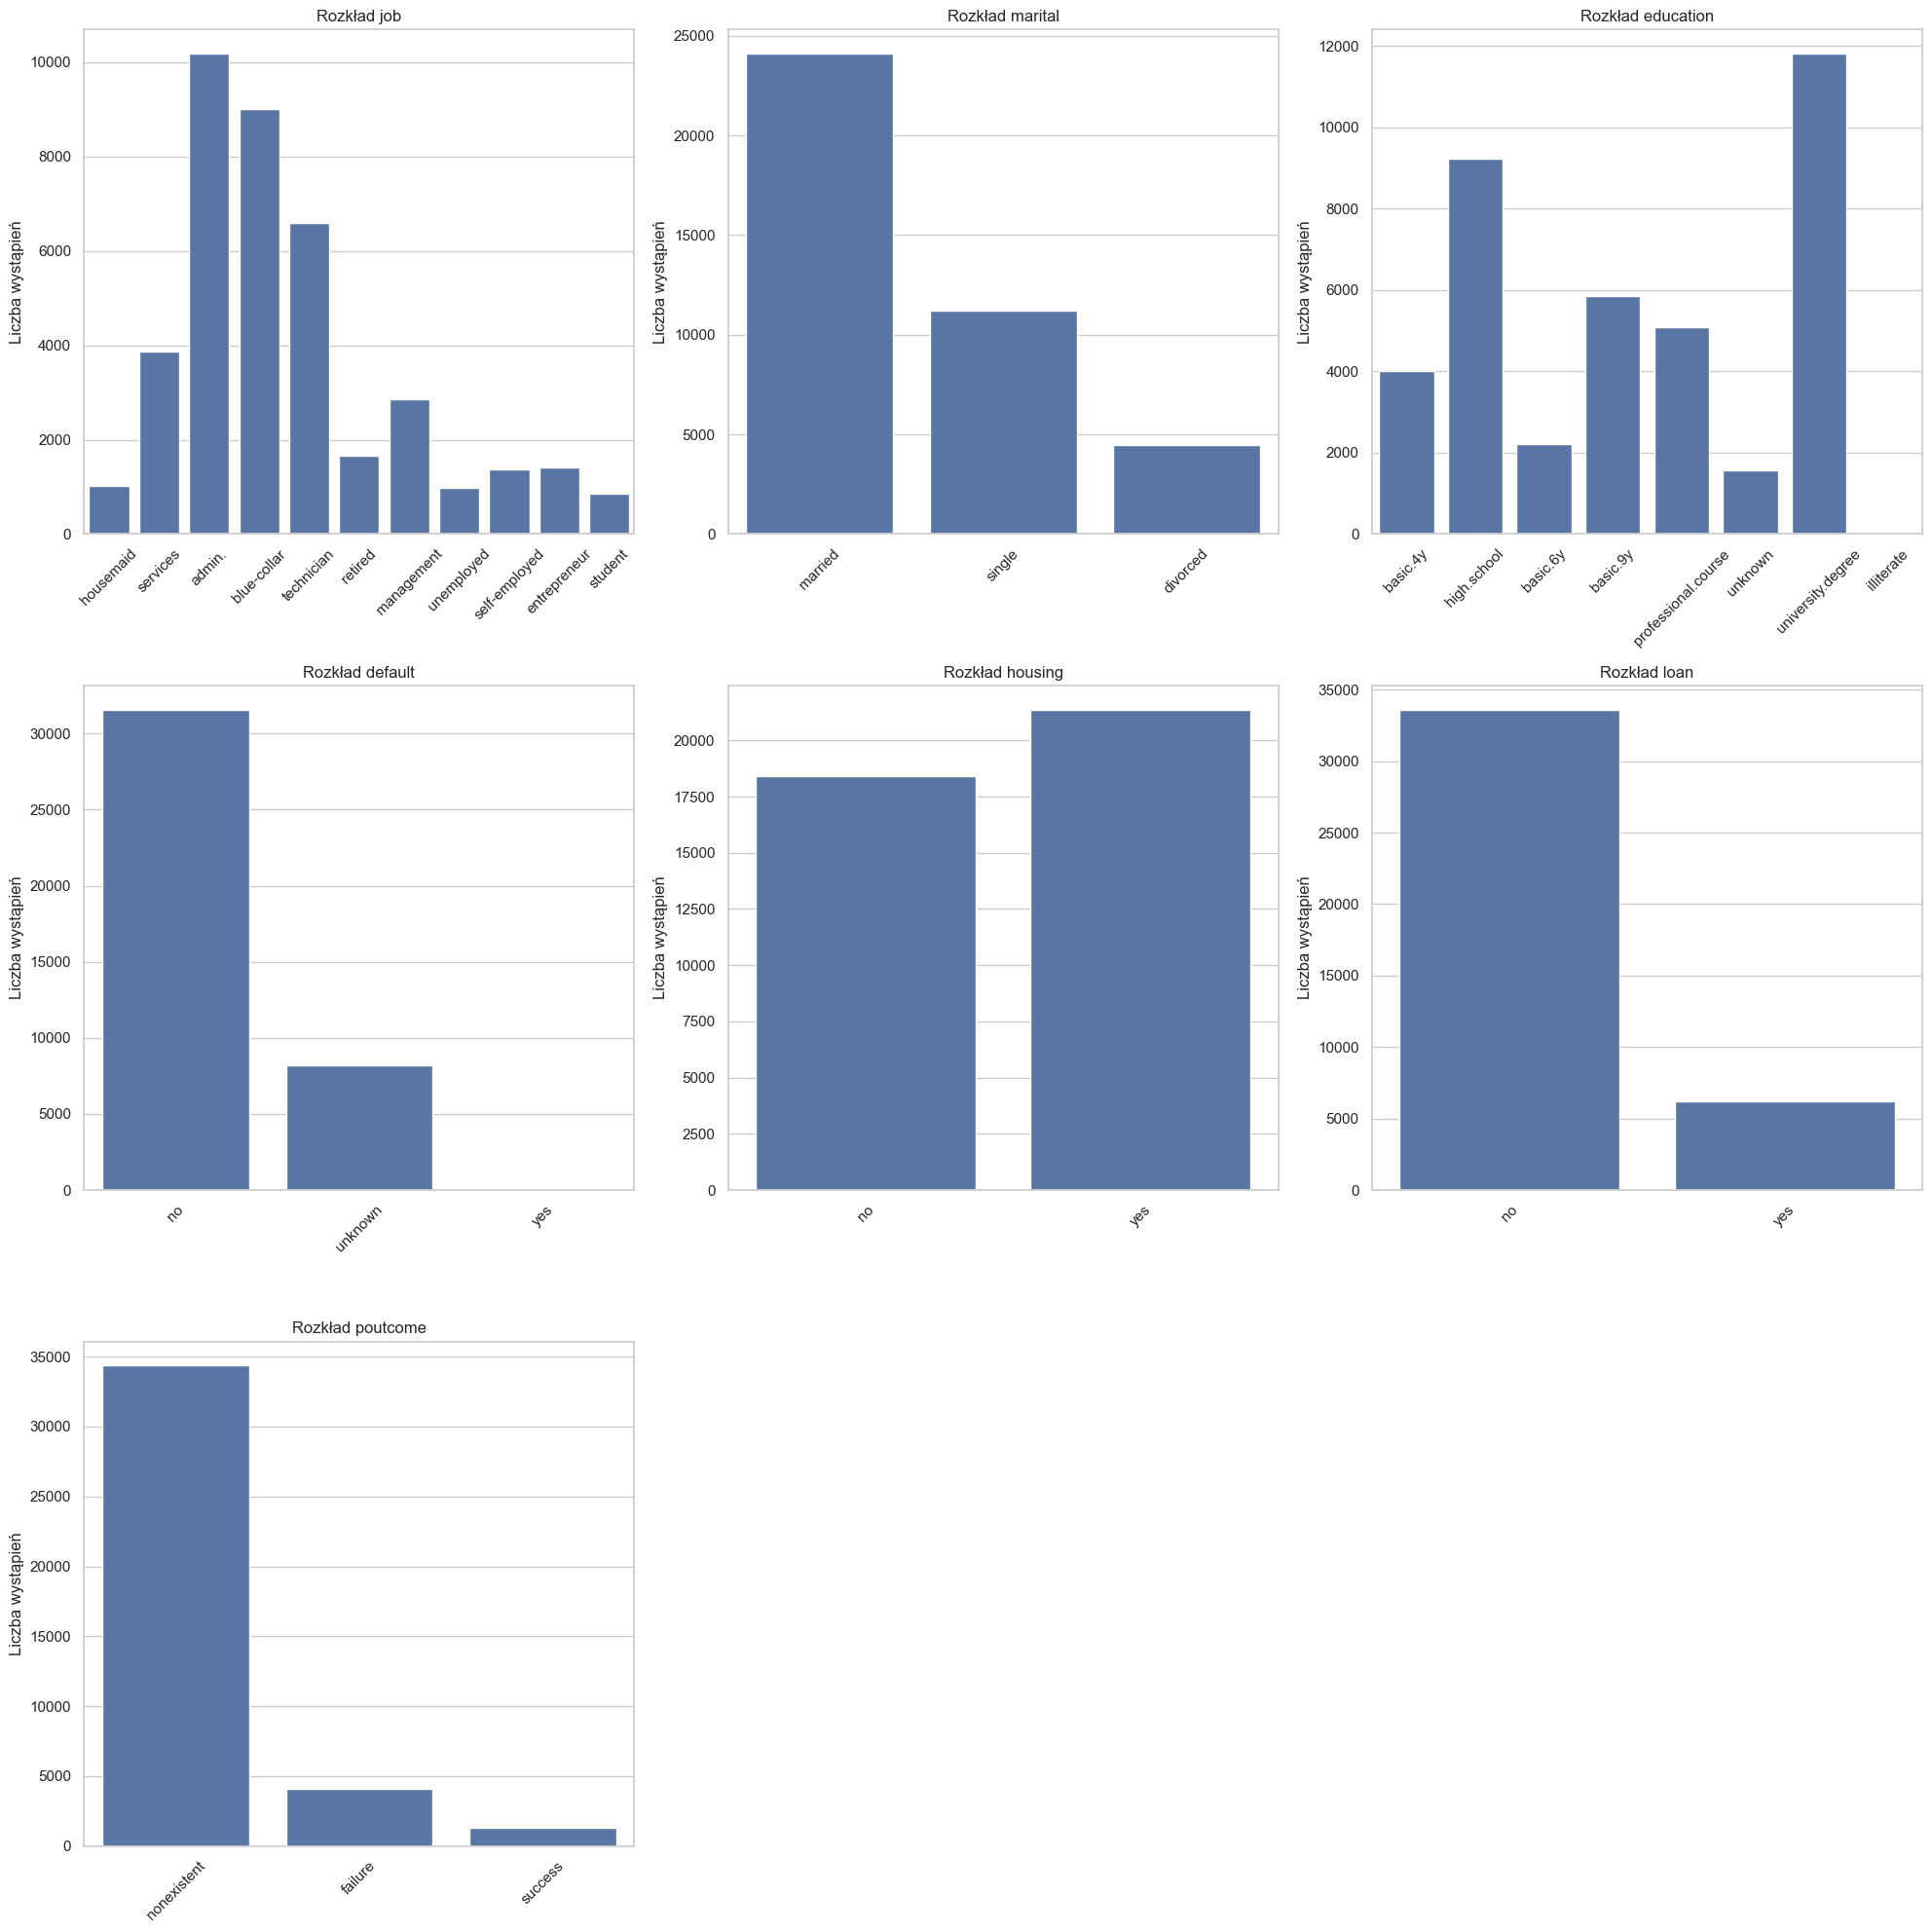

In [19]:
# Usuwam te unknown, bo nie ma ich wcale duzo
df2 = df2[df2['job'] != 'unknown']
df2 = df2[df2['marital'] != 'unknown']
df2 = df2[df2['housing'] != 'unknown']

# Z niektorych zmiennych kategorycznych nie chce na razie korzystac
columns_to_drop = ['day_of_week', 'month', 'contact']
df2 = df2.drop(columns=columns_to_drop)

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Liczenie wartości 'unknown' w każdej zmiennej kategorycznej
unknown_counts = {}
for col in categorical_columns:
    unknown_count = df2[col].value_counts().get('unknown', 0)
    unknown_counts[col] = unknown_count

# Wyświetlenie liczby 'unknown' dla każdej zmiennej kategorycznej
for col, count in unknown_counts.items():
    print(f"{col}: {count} 'unknown'")

# Ustawienie stylu wykresów
sb.set_theme(style="whitegrid")

# Liczba zmiennych kategorycznych
num_categorical = len(categorical_columns)

# Ustalenie rozmiaru siatki wykresów
fig, axes = plt.subplots(nrows=(num_categorical + 2) // 3, ncols=3, figsize=(20, 20))

# Przejście przez wszystkie zmienne kategoryczne i rysowanie wykresów
for ax, col in zip(axes.flatten(), categorical_columns):
    sb.countplot(data=df2, x=col, ax=ax)
    ax.set_title(f'Rozkład {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Liczba wystąpień')
    ax.tick_params(axis='x', rotation=45)

# Usunięcie pustych wykresów
for ax in axes.flatten()[len(categorical_columns):]:
    fig.delaxes(ax)

# Dopasowanie wykresów
plt.tight_layout()
plt.show()

In [20]:



# One-Hot Encoding dla zmiennych kategorycznych
df3 = pd.get_dummies(df2, columns=categorical_columns)
df3

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,True,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,True,False,True,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,True,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,True,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,True,True,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,True,False,True,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,True,True,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,True,False,True,False,False,True,False


In [23]:
# false -> 0, true -> 1
df4 = df3.map(lambda x: 1 if x == True else (0 if x == False else x))

# Normalizacja zmiennych numerycznych
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range=(0, 1))
df4[numeric_columns] = scaler.fit_transform(df4[numeric_columns])

In [28]:
# podział na zbiór treningowy i testowy

x = df4.drop(columns=['y'])  # 'y' to Twoja zmienna docelowa
y = df4['y']

# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)